In [ ]:
! pip install matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# ==============================================================================
#                                1. DATA LOADING
# ==============================================================================

In [7]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


# ==============================================================================
#                               2. DATA CLEANING
# ==============================================================================

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
# Missing Values Percentage
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_percentage

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
tenure_group        0.0
dtype: float64

In [ ]:
quantile_labels = ['Low Tenure', 'Medium Tenure', 'High Tenure']
df['TenureQuantile'] = pd.qcut(df['tenure'], q=3, labels=quantile_labels, duplicates='drop')

In [35]:
missing_charges_df = df[df['TotalCharges'].isnull()].copy()
result = missing_charges_df[['TenureQuantile', 'customerID', 'tenure']]
print(f"Found {len(missing_charges_df)} customers with missing TotalCharges.")
print("-" * 60)
print("Displaying the 'TenureQuantile' and 'customerID' for these customers:")
print(result)

Found 11 customers with missing TotalCharges.
------------------------------------------------------------
Displaying the 'TenureQuantile' and 'customerID' for these customers:
     TenureQuantile  customerID  tenure
488      Low Tenure  4472-LVYGI       0
753      Low Tenure  3115-CZMZD       0
936      Low Tenure  5709-LVOEQ       0
1082     Low Tenure  4367-NUYAO       0
1340     Low Tenure  1371-DWPAZ       0
3331     Low Tenure  7644-OMVMY       0
3826     Low Tenure  3213-VVOLG       0
4380     Low Tenure  2520-SGTTA       0
5218     Low Tenure  2923-ARZLG       0
6670     Low Tenure  4075-WKNIU       0
6754     Low Tenure  2775-SEFEE       0


In [26]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

missing_charges = df['TotalCharges'].isnull().sum()
print(f"Found {missing_charges} customers with missing TotalCharges")

Found 11 customers with missing TotalCharges (likely new customers).


In [36]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# ==============================================================================
#                      3. EXPLORATORY DATA ANALYSIS (EDA)
# ==============================================================================

In [37]:
sns.set_style("whitegrid")
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"\nOverall Churn Rate:\n{churn_rate}\n")
def plot_churn_by_category(dataframe, column, title):
    """Creates a count plot showing churn distribution for a categorical column."""
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, hue='Churn', data=dataframe, palette="viridis")
    plt.title(title, fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.xticks(rotation=15)
    # Add percentages on top of the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/len(dataframe)*100:.1f}%', ha="center", fontsize=10)
    plt.show()


Overall Churn Rate:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64



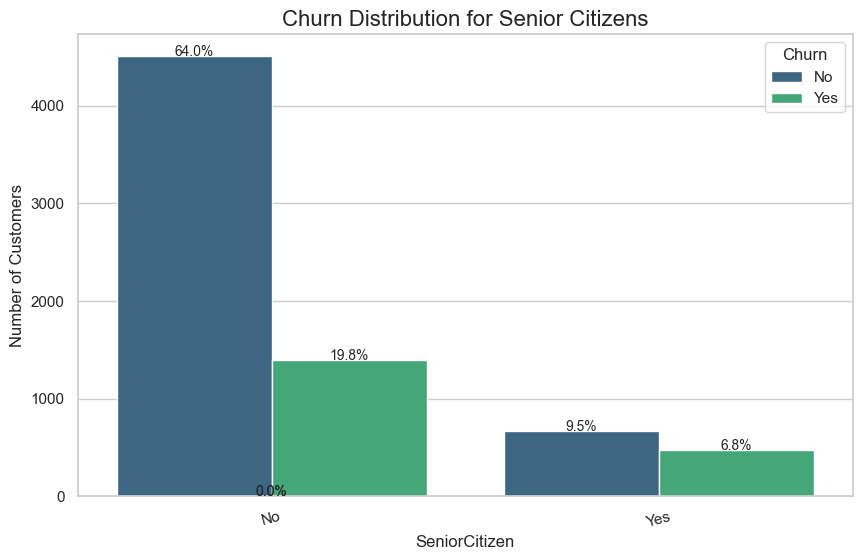

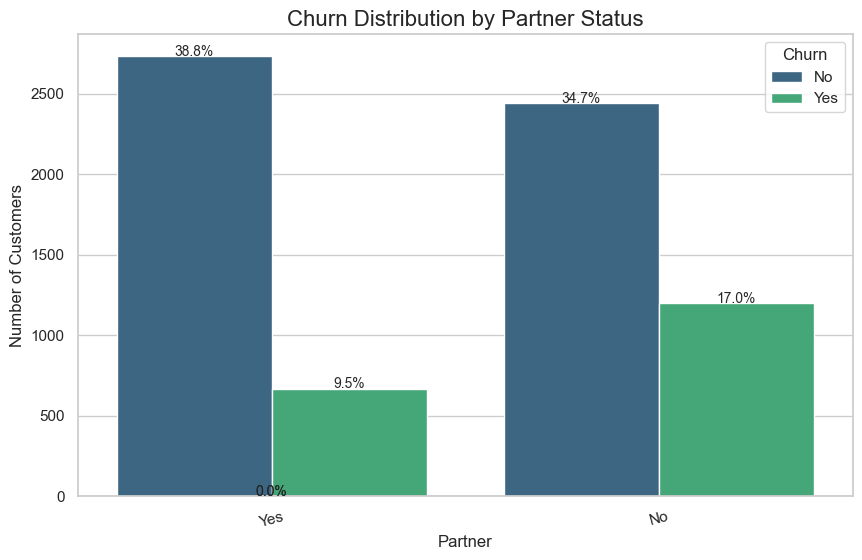

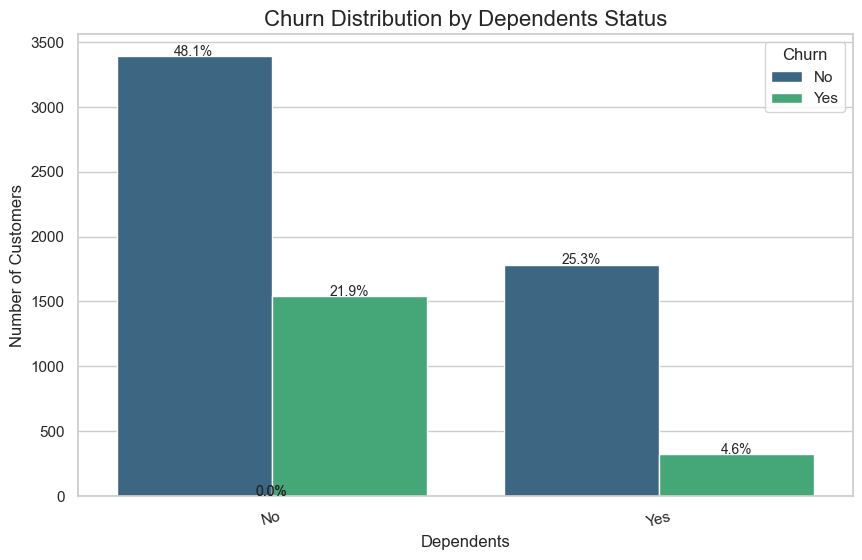

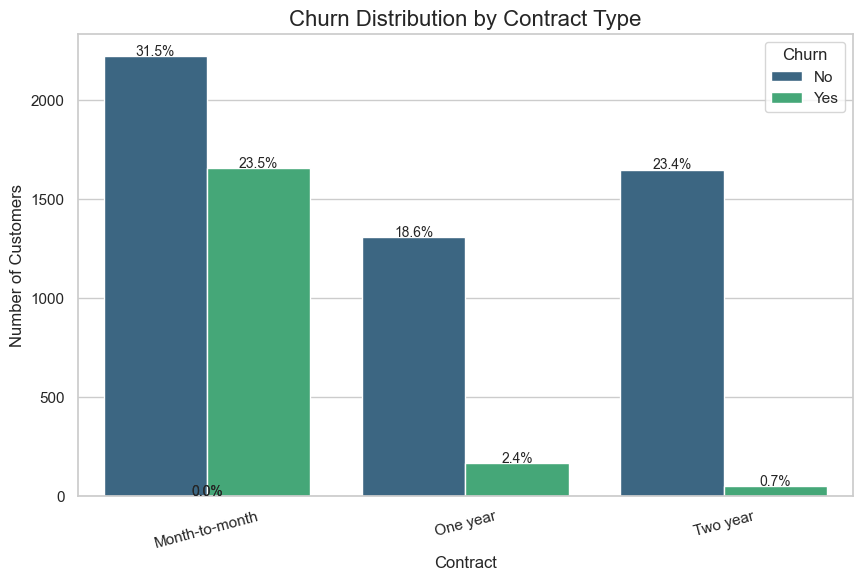

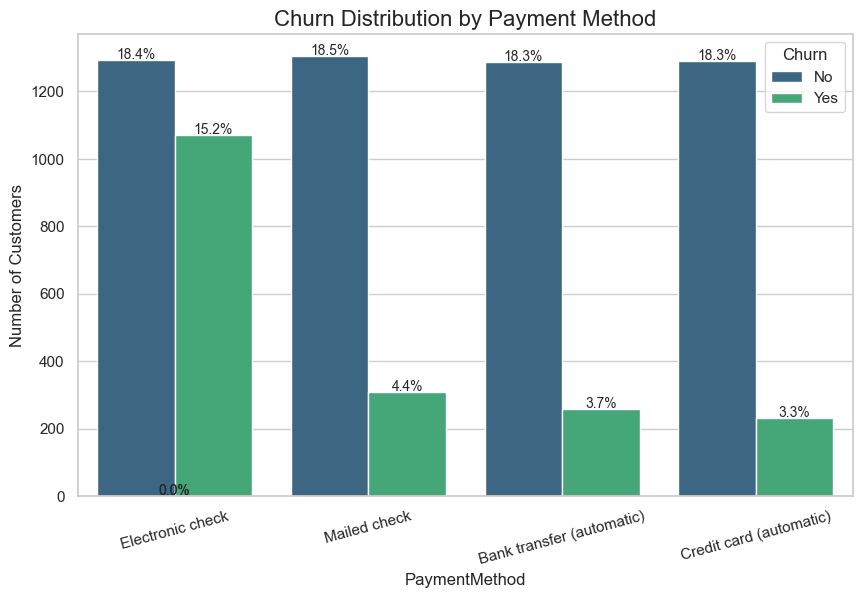

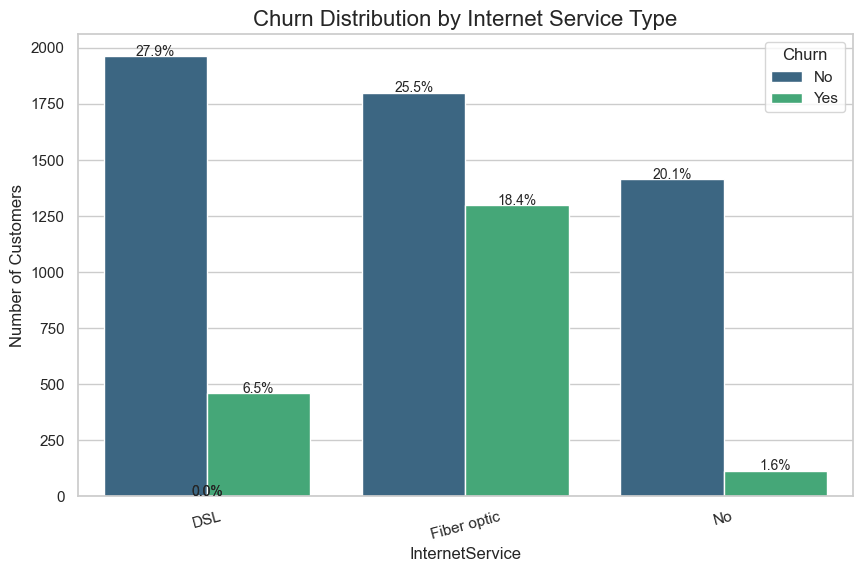

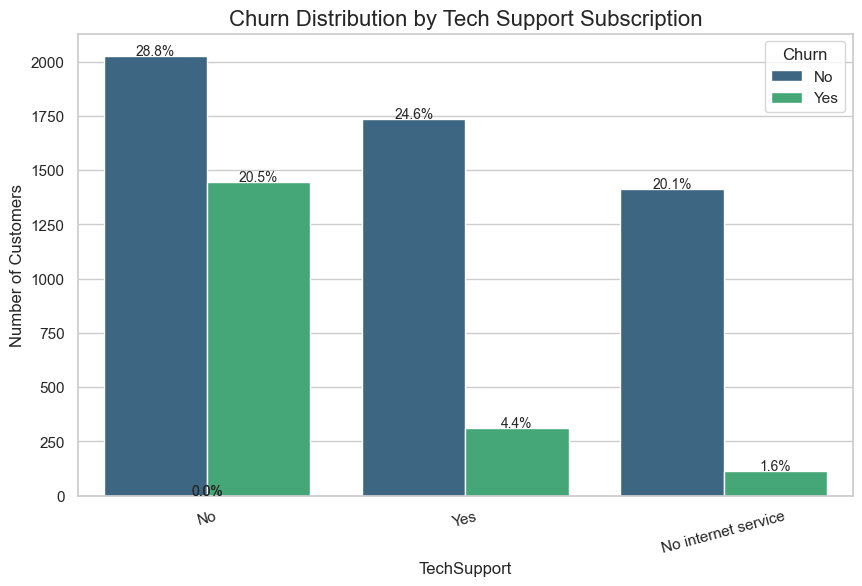

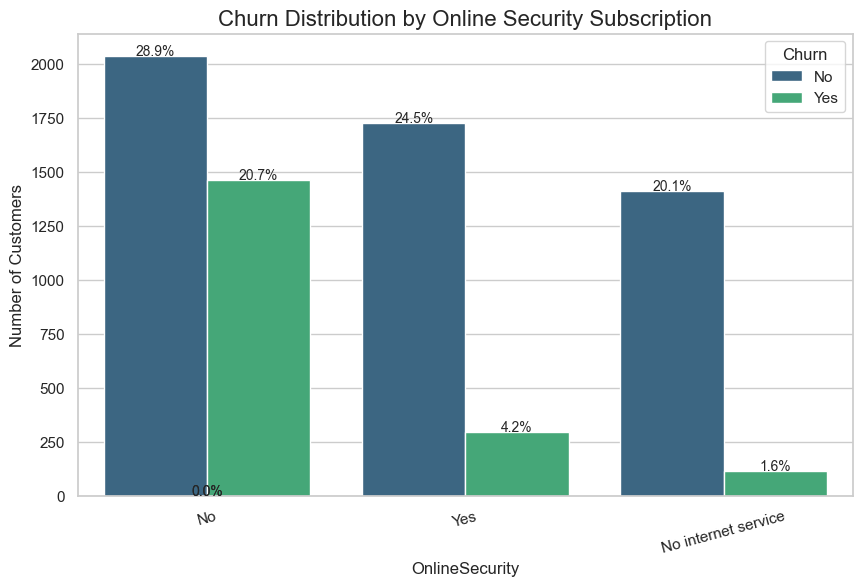

In [38]:
plot_churn_by_category(df, 'SeniorCitizen', 'Churn Distribution for Senior Citizens')
plot_churn_by_category(df, 'Partner', 'Churn Distribution by Partner Status')
plot_churn_by_category(df, 'Dependents', 'Churn Distribution by Dependents Status')
plot_churn_by_category(df, 'Contract', 'Churn Distribution by Contract Type')
plot_churn_by_category(df, 'PaymentMethod', 'Churn Distribution by Payment Method')
plot_churn_by_category(df, 'InternetService', 'Churn Distribution by Internet Service Type')
plot_churn_by_category(df, 'TechSupport', 'Churn Distribution by Tech Support Subscription')
plot_churn_by_category(df, 'OnlineSecurity', 'Churn Distribution by Online Security Subscription')


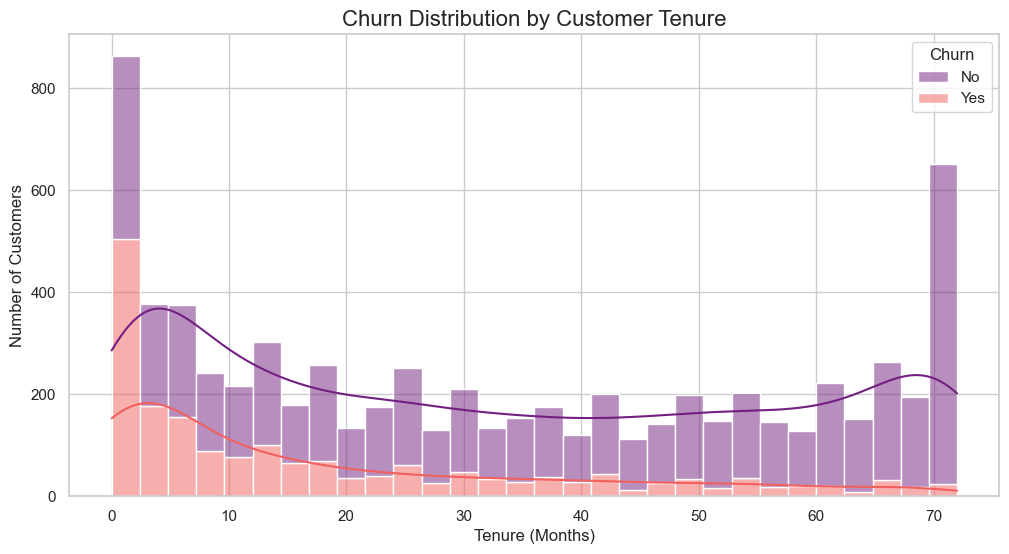

In [39]:
# Analysis by Tenure
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette="magma", kde=True)
plt.title('Churn Distribution by Customer Tenure', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

<Axes: xlabel='PaymentMethod'>

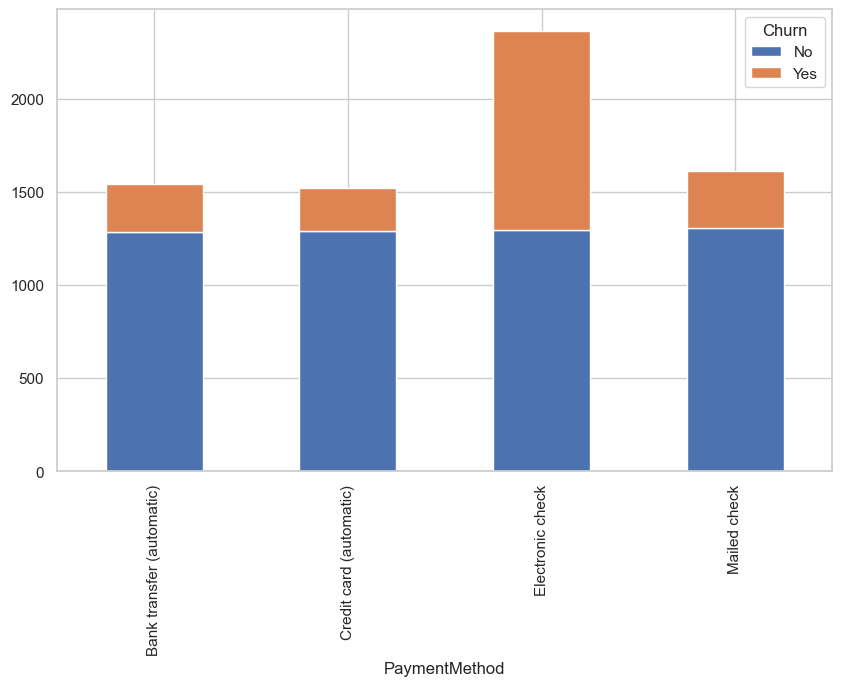

In [53]:
pd.crosstab(df.PaymentMethod,df.Churn).plot(kind='bar',figsize=(10,6),stacked=True)

<Axes: xlabel='gender'>

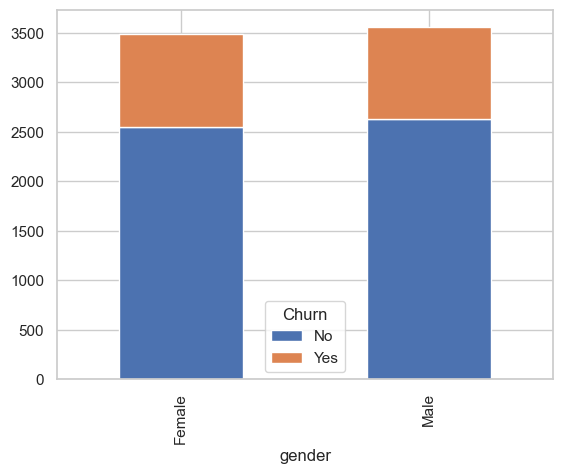

In [54]:
pd.crosstab(df['gender'],df['Churn']).plot(kind='bar',stacked=True)

In [65]:
tenure_bins = pd.qcut(df['tenure'], q=3, duplicates='drop')
bin_ranges = tenure_bins.unique().sort_values()
quantile_names = ['Low', 'Medium', 'High']
quantile_labels = [
    f"{quantile_names[i]}(Months {int(r.left)+1}-{int(r.right)})"
    for i, r in enumerate(bin_ranges)
]
df['TenureQuantile'] = pd.qcut(df['tenure'], q=3, labels=quantile_labels, duplicates='drop')
print("--- Calculated Tenure Ranges with Labels ---")
print(df['TenureQuantile'].value_counts().sort_index())

--- Calculated Tenure Ranges with Labels ---
TenureQuantile
Low(Months 1-14)        2371
Medium(Months 15-47)    2369
High(Months 48-72)      2303
Name: count, dtype: int64


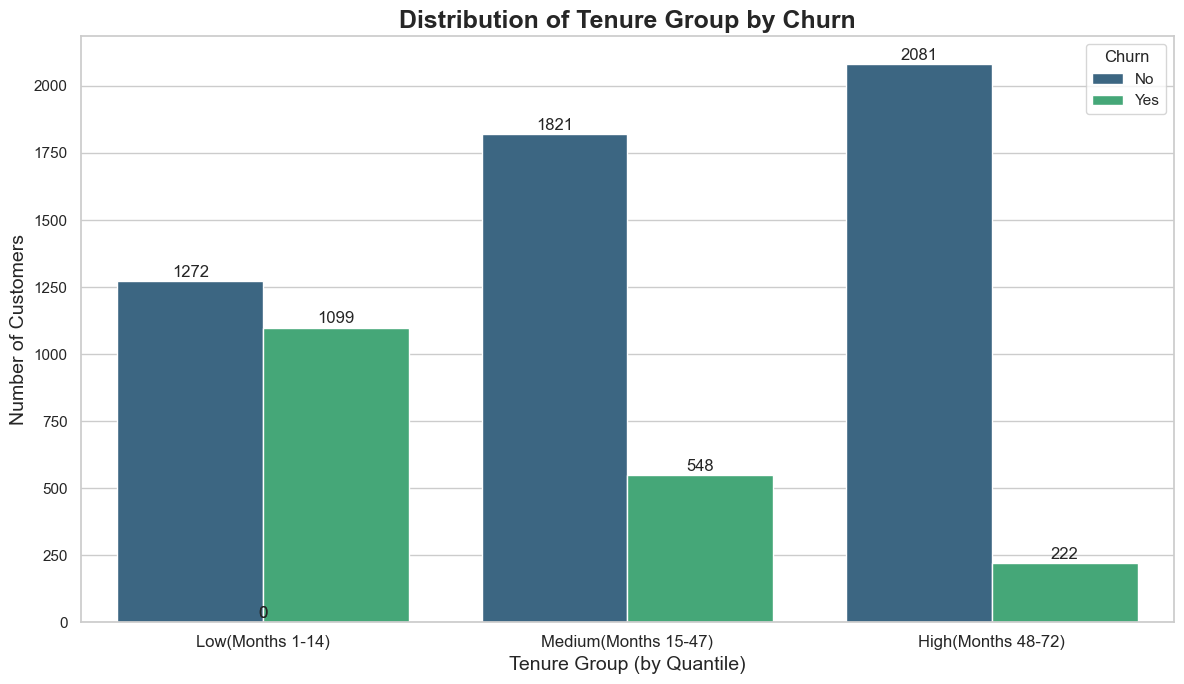

In [66]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df, x='TenureQuantile', hue='Churn', palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 15,
        s=f'{height:.0f}',
        ha='center',
        fontsize=12
    )
plt.title('Distribution of Tenure Group by Churn', fontsize=18, fontweight='bold')
plt.xlabel('Tenure Group (by Quantile)', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=12) 
plt.tight_layout()
plt.show()

In [72]:
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'InternetService', 'Contract', 'PaymentMethod', 'Churn',
    'tenure_group', 'TenureQuantile'
]

# One-hot encode these columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

/var/folders/5v/1f87_8ss0z3_1vz8yv1kv37w0000gn/T/ipykernel_2531/797157091.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tt=sns.kdeplot(df.tenure[(df.Churn=='Yes')],color='Red',shade=True)
/var/folders/5v/1f87_8ss0z3_1vz8yv1kv37w0000gn/T/ipykernel_2531/797157091.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tt=sns.kdeplot(df.tenure[(df.Churn=='No')],color='Blue',shade=True)


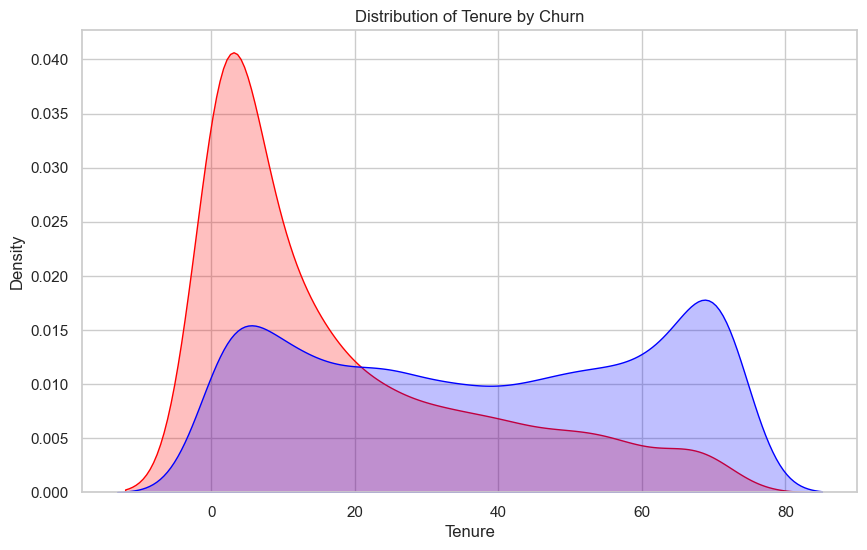

In [69]:
plt.figure(figsize=(10, 6))
tt=sns.kdeplot(df.tenure[(df.Churn=='Yes')],color='Red',shade=True)
tt=sns.kdeplot(df.tenure[(df.Churn=='No')],color='Blue',shade=True)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.show()

In [83]:
df_encoding=pd.get_dummies(df)

,tenure,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_0 - 10 Years,TenureQuantile_Low(Months 1-14),TenureQuantile_Medium(Months 15-47),TenureQuantile_High(Months 48-72)
0,1,29.85,29.85,False,False,False,False,False,False,False,...,False,False,True,False,True,False,True,True,False,False
1,34,56.95,1889.50,False,False,False,False,False,False,False,...,False,False,False,True,True,False,True,False,True,False
2,2,53.85,108.15,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,False,False
3,45,42.30,1840.75,False,False,False,False,False,False,False,...,True,False,False,False,True,False,True,False,True,False
4,2,70.70,151.65,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,True,False,False


In [84]:
for col in df_encoding.columns:
    if df_encoding[col].dtype == 'bool':
        df_encoding[col] = df_encoding[col].astype(int)


df_encoding.head()

,tenure,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_0 - 10 Years,TenureQuantile_Low(Months 1-14),TenureQuantile_Medium(Months 15-47),TenureQuantile_High(Months 48-72)
0,1,29.85,29.85,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
1,34,56.95,1889.50,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
2,2,53.85,108.15,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0
3,45,42.30,1840.75,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
4,2,70.70,151.65,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,0,0


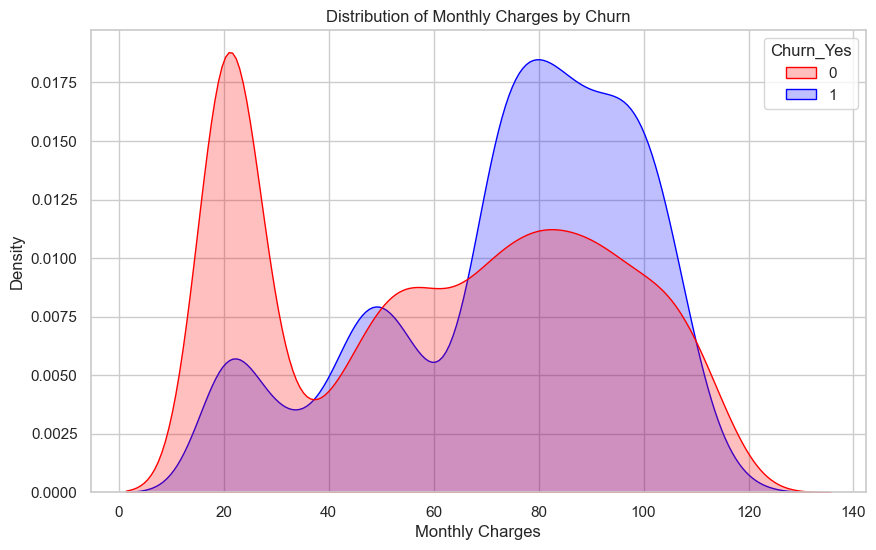

In [87]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_encoding, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, palette={0: 'Red', 1: 'Blue'})
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

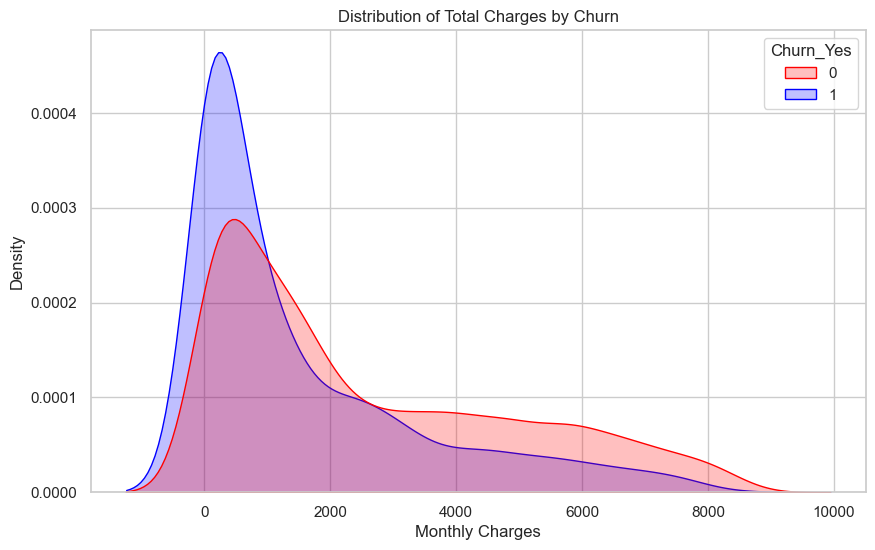

In [89]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_encoding, x='TotalCharges', hue='Churn_Yes', fill=True, common_norm=False, palette={0: 'Red', 1: 'Blue'})
plt.title('Distribution of Total Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

Churn Analysis for Churn Value is  Yes


Monthly Recurring Revenue (MRR) Lost to Churn by Segment:
--------------------------------------------------
By Contract Type:
Contract
Month-to-month    120847.10
One year           14118.45
Two year            4165.30

By Payment Method:
PaymentMethod
Electronic check             84288.75
Bank transfer (automatic)    20091.90
Credit card (automatic)      17946.60
Mailed check                 16803.60

By Online Security Subscription:
OnlineSecurity
No                     112762.75
Yes                     24066.50
No internet service      2301.60
--------------------------------------------------


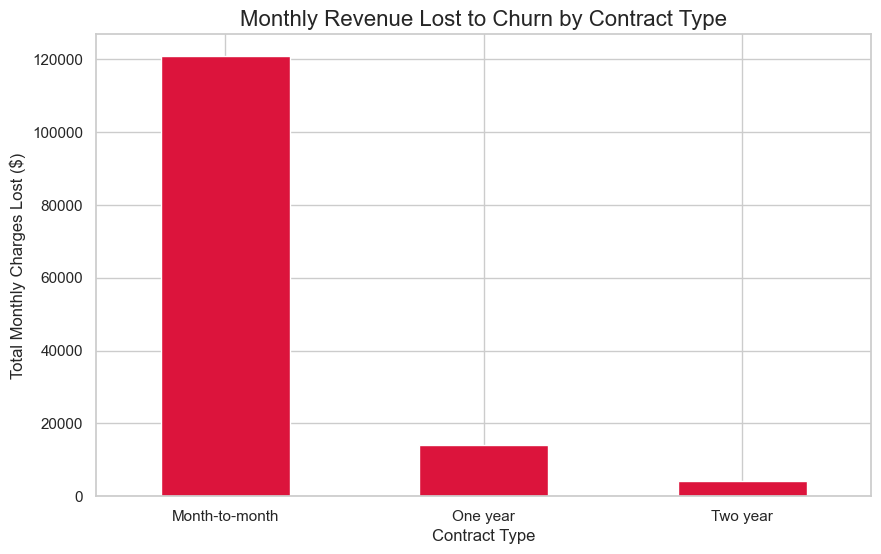


Insight: The financial data confirms that 'Month-to-month' contracts are not just the largest group of churners by count, but they represent the most significant financial leak by a massive margin.


In [40]:
churned_df = df[df['Churn'] == 'Yes']

lost_mrr_by_contract = churned_df.groupby('Contract')['MonthlyCharges'].sum().sort_values(ascending=False)
lost_mrr_by_payment = churned_df.groupby('PaymentMethod')['MonthlyCharges'].sum().sort_values(ascending=False)
lost_mrr_by_onlinesec = churned_df.groupby('OnlineSecurity')['MonthlyCharges'].sum().sort_values(ascending=False)

print("\nMonthly Recurring Revenue (MRR) Lost to Churn by Segment:")
print("-" * 50)
print("By Contract Type:")
print(lost_mrr_by_contract.round(2).to_string())
print("\nBy Payment Method:")
print(lost_mrr_by_payment.round(2).to_string())
print("\nBy Online Security Subscription:")
print(lost_mrr_by_onlinesec.round(2).to_string())
print("-" * 50)

plt.figure(figsize=(10, 6))
lost_mrr_by_contract.plot(kind='bar', color='crimson')
plt.title('Monthly Revenue Lost to Churn by Contract Type', fontsize=16)
plt.ylabel('Total Monthly Charges Lost ($)')
plt.xlabel('Contract Type')
plt.xticks(rotation=0)
plt.show()

print("\nInsight: The financial data confirms that 'Month-to-month' contracts are not just the largest group of churners by count, but they represent the most significant financial leak by a massive margin.")


High-Value Customers

Analyzing churn for 1771 customers considered 'High-Value' (Monthly Charges >= $89.85).


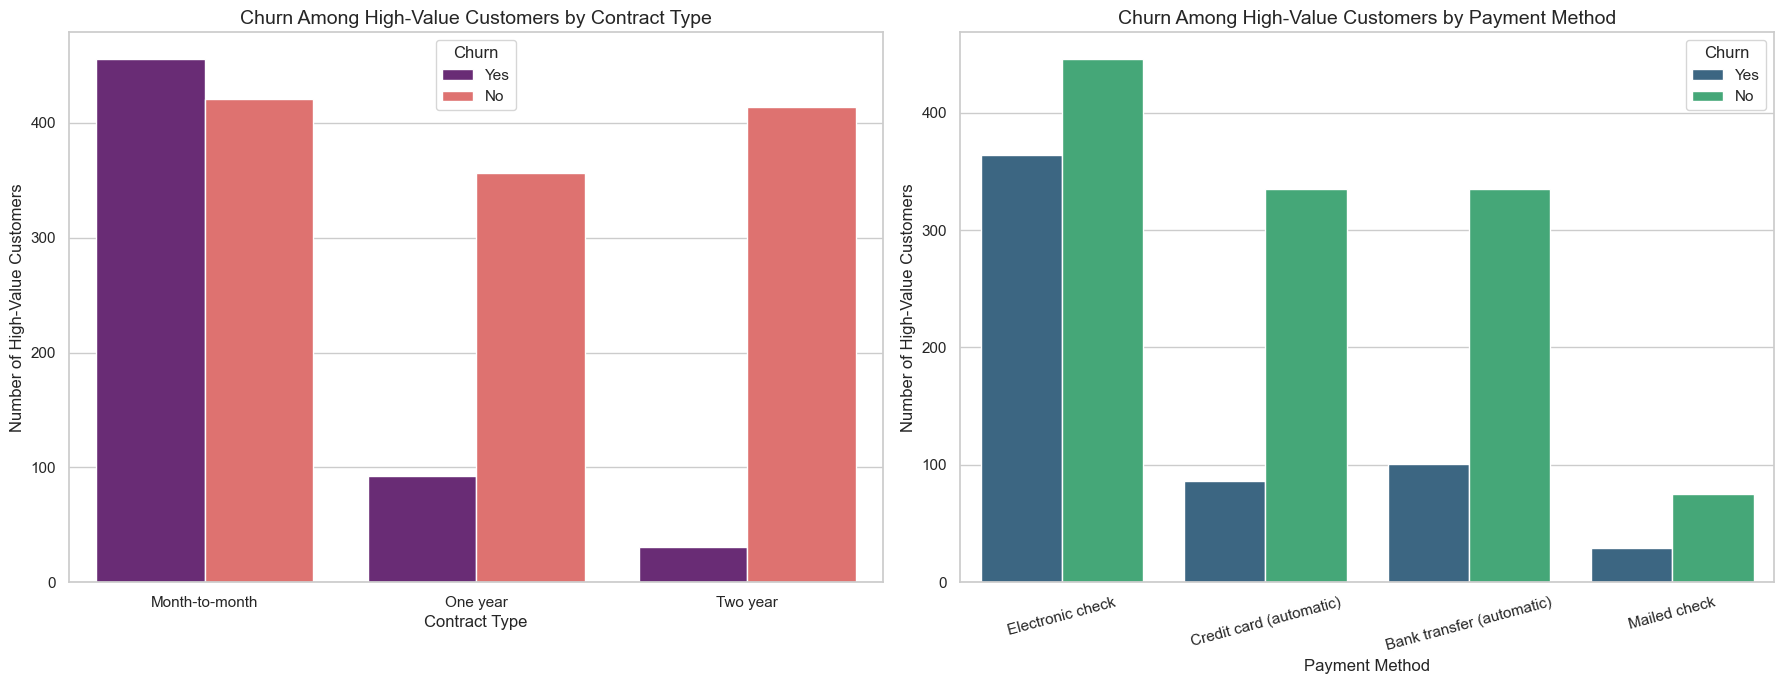

In [91]:

print("High-Value Customers")

high_value_cutoff = df['MonthlyCharges'].quantile(0.75)
high_value_customers_df = df[df['MonthlyCharges'] >= high_value_cutoff]

print(f"\nAnalyzing churn for {len(high_value_customers_df)} customers considered 'High-Value' (Monthly Charges >= ${high_value_cutoff:.2f}).")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.countplot(x='Contract', hue='Churn', data=high_value_customers_df, ax=axes[0], palette='magma')
axes[0].set_title('Churn Among High-Value Customers by Contract Type', fontsize=14)
axes[0].set_xlabel('Contract Type')
axes[0].set_ylabel('Number of High-Value Customers')

sns.countplot(x='PaymentMethod', hue='Churn', data=high_value_customers_df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn Among High-Value Customers by Payment Method', fontsize=14)
axes[1].set_xlabel('Payment Method')
axes[1].set_ylabel('Number of High-Value Customers')
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()




In [92]:
median_monthly_charge = df['MonthlyCharges'].median()

target_df = df[
    (df['Contract'] == 'Month-to-month') &
    (df['MonthlyCharges'] >= median_monthly_charge)
].copy() 

print(f"\nIdentified {len(target_df)} customers for our A/B test intervention.")
print(f"(These are month-to-month customers with charges >= ${median_monthly_charge:.2f})")




Identified 2049 customers for our A/B test intervention.
(These are month-to-month customers with charges >= $70.35)


In [93]:
np.random.seed(42)
target_df['TestGroup'] = np.random.choice(['A (Control)', 'B (Test)'], size=len(target_df))
print("\nRandomly assigned target customers to Control and Test groups:")
print(target_df['TestGroup'].value_counts())



Randomly assigned target customers to Control and Test groups:
TestGroup
A (Control)    1042
B (Test)       1007
Name: count, dtype: int64


In [94]:
print("\nAnalyzing the simulated results...")
contingency_table = pd.crosstab(target_df['TestGroup'], target_df['Churn'])
print("\nContingency Table (Observed Frequencies):")
print(contingency_table)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-Squared Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")


Analyzing the simulated results...

Contingency Table (Observed Frequencies):
Churn         No  Yes
TestGroup            
A (Control)  506  536
B (Test)     463  544

Chi-Squared Statistic: 1.2683
P-value: 0.2601


Based on the chi-squared test, there is no significant evidence to suggest that the churn rate differs between the control and test groups (p = 0.2601). Any observed difference is likely due to random chance.